### Business Problem

The cust_seg data set contains information of 200 customers who were part of the last campaign conducted by one of the major  Bank-credit card division. The CMO would like to test the following hypothesis based on the data. 

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import scipy.stats as stats

### Importing the data

In [6]:
df = pd.read_csv("cust_seg.csv")
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [7]:
# shape and info of the data:
df.shape

(200, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


From above, can see that there are no missing values in the data.

The hypothesis are as follows:

### 1. Card usage has been improved significantly from last year usage which is 50. 

To test whether the card usage has improved from last year usage, shall conduct One-Sample T-Test.

The null and alternative hypothesis:
    
    
    H0: Lastest month usage = 50
    (There is no improvement in the card usage from last year usage)
    
    H1: Lastest month usage = 50
    (There is significant improvement in the card usage from last year usage)
    
We will conduct the test at 5% significance level. It's a one-tailed test.

In [23]:
# Performing the One Sample t-test:

t1 = stats.ttest_1samp(a = df.Latest_mon_usage, popmean = 50)
t1

Ttest_1sampResult(statistic=16.57233752433133, pvalue=2.4963719280931583e-39)

In [27]:
print('The T-test-statistic is {} and the p-value is {}.' .format(t1[0], t1[1]))

The T-test-statistic is 16.57233752433133 and the p-value is 2.4963719280931583e-39.


In [28]:
# Checking if p-value is greater than 5% alpha:

t1[1] > 0.05

False

#### Conclusion:

The p-value is less than 5% alpha hence we reject the null hypothesis. With 95% confidence can conclude that there is significant improvement in the card usage from last year usage. Therefore, it is statistically significant from 50.

----------

### 2. The last campaign was successful in terms usage of credit card. 


To test whether the last campaign is successful in terms of usage of credit card, we need to check if the credit card usage after the campaign is greater than credit card usage before the campaign then can conclude it has been succcssful.


Hence, shall conduct two tests, one test to compare the means of pre_usage & Post_usage_1month and second test to compare the means of pre_usage & Post_usage_2ndmonth

#### Test 1: 

The null and alternative hypothesis:
    
    
H0: Average usage of Credit Card in before campaign (pre_usage) == Average usage of Credit Card in the 1st month post campaign (post_usage_1month)
         
      (The campaign was not successful in the first month)
    
H1: Average usage of Credit Card in before campaign (pre_usage) < Average usage of Credit Card in the 1st month post campaign (post_usage_1month)
     
     (The campaign was successful in the first month)
    
We will conduct the Paired Two Sample t-test at 5% significance level. It's a one-tailed test.

In [46]:
print('The average usage of credit card before the campaign is {}.'.format(df.pre_usage.mean()))
print('The average usage of credit card one month post the campaign is {}.'.format(df.Post_usage_1month.mean()))

The average usage of credit card before the campaign is 52.23.
The average usage of credit card one month post the campaign is 52.775.


In [34]:
# Paired Sample T-test for pre_usage and post_usage_1month
t2 = stats.ttest_rel(df.pre_usage, df.Post_usage_1month)
t2

Ttest_relResult(statistic=-0.8673065458794775, pvalue=0.3868186820914985)

In [36]:
print('The T-test statistic is {} and the p-value is {}.'.format(t2[0], t2[1]))

The T-test statistic is -0.8673065458794775 and the p-value is 0.3868186820914985.


In [37]:
# Checking if p-value is greater than 5% alpha:
t2[1] > 0.05

True

#### Conclusion for Test 1:

The p-value is greater than 5% alpha, hence we fail to reject the null hypothesis. With 95% confidence can conclude that the average usage of credit card before the campaign  is equal to average usage of credit card in the 1st month post the campaign. Therefore, the campaign was not successful in the first month.

-------

#### Test 2: 

The null and alternative hypothesis:
    
    
H0: Average usage of Credit Card in before campaign (pre_usage) == Average usage of Credit Card in the 2nd month post campaign (post_usage_2ndmonth)
    
    (The campaign was not successful in the second month)
    
H1: Average usage of Credit Card in before campaign (pre_usage) < Average usage of Credit Card in the 2nd month post campaign (post_usage_2ndmonth)
    
    (The campaign was successful in the second month)
    
We will conduct the Paired Two Sample t-test at 5% significance level. It's a one-tailed test.

In [47]:
print('The average usage of credit card before the campaign is {}.'.format(df.pre_usage.mean()))
print('The average usage of credit card two months post the campaign is {}.'.format(df.post_usage_2ndmonth.mean()))

The average usage of credit card before the campaign is 52.23.
The average usage of credit card two months post the campaign is 58.05250000000003.


In [38]:
# Paired Sample T-test for pre_usage and post_usage_2ndmonth
t3 = stats.ttest_rel(df.pre_usage, df.post_usage_2ndmonth)
t3

Ttest_relResult(statistic=-8.866832246938742, pvalue=4.295733828012836e-16)

In [39]:
print('The T-test statistic is {} and the p-value is {}.'.format(t3[0], t3[1]))

The T-test statistic is -8.866832246938742 and the p-value is 4.295733828012836e-16.


In [40]:
# checking if p-value is greater than 5% alpha:
t3[1] > 0.05

False

#### Conclusion for Test 2:

The p-value is less than 5% alpha, hence we reject the null hypothesis. With 95% confidence can conclude that the average usage of credit card before the campaign  is less than the average usage of credit card in the 2nd month post the campaign. Therefore, the campaign was successful in the second month.

--------------

### 3. Is there any difference between males & females in terms of credit card usage?

To test for the difference in credit card between males and females, shall compare the means for Latest month card usage for males and females. 

The null and alternative hypothesis:
    

H0: Average usage of Credit Card for Latest Month for Males == Average usage of Credit Card for Latest Month for Females
         
         (There is no difference in the credit card usage for males and females.)
        
H1: Average usage of Credit Card for Latest Month for Males <> Average usage of Credit Card for Latest Month for Females
        
        (There is difference in the credit card usage for males and females.)
    

We will conduct the Two sample Independent T-Test at 5% significance level. It's a two-tailed test.

In [49]:
# Step 1: Getting the respective data:
male_usage = df.Latest_mon_usage.loc[df.sex == 0]
female_usage = df.Latest_mon_usage.loc[df.sex == 1]

In [50]:
print('The average of latest month credit card usgae for males is {}.'.format(male_usage.mean()))
print('The average of latest month credit card usgae for females is {}.'.format(female_usage.mean()))

The average of latest month credit card usgae for males is 63.53406593406595.
The average of latest month credit card usgae for females is 62.87339449541283.


In [52]:
#  Step 2: Perform the test:

# Testing Under the assumption that Male credit card usage and female credit card usage have equal variance:

equal_var_cc = stats.ttest_ind(male_usage, female_usage, equal_var = True)
equal_var_cc


Ttest_indResult(statistic=0.41299864929687874, pvalue=0.680054497423219)

In [53]:
#  Testing Under the assumption that Male credit card usage and female credit card usage do not have equal variance:

unequal_var_cc = stats.ttest_ind(male_usage, female_usage, equal_var = False)
unequal_var_cc

Ttest_indResult(statistic=0.41096501169154154, pvalue=0.6815673012471315)

In [54]:
# difference in the statistic for equal and unequal variance:

equal_var_cc[0] - unequal_var_cc[0]

0.002033637605337202

As the difference between equal variance statistic and unequal variance statistic is very less, almost negligible, hence we would conduct the test under equal variance assumption.

In [56]:
print('The T-test statistics is {} and the p-value is {}.'.format(equal_var_cc[0], equal_var_cc[1]))

The T-test statistics is 0.41299864929687874 and the p-value is 0.680054497423219.


In [57]:
# Checking if the p-value is greater than 5% alpha:

equal_var_cc[1] > 0.05

True

#### Conclusion:

The p-value is greater than 5% alpha, hence we fail to reject the null hypothesis. With 95% confidence can conclude that the average usage of credit card for males is equal to average usage of credit card for females. Therefore, there is no difference between males and females in terms of credit card usage.

-------------

### 4. Is there any difference between segments of customers in terms of credit card usage?

To test for the difference in the credit card usage between the segments, shall compare the means for Latest month card usage between the segments. 

The null and alternative hypothesis:

 H0: Average usage of Credit Card for Latest Month for Segment 1 == Average usage of Credit Card for Latest Month for Segment 2 == Average usage of Credit Card for Latest Month for Segment 3
    
            mean of Latest_mon_usage for Segment 1 == mean of Latest_mon_usage for Segment 2
                       == mean of Latest_mon_usage for Segment 3
            
               (There is no influence of segments on latest month credit card usage)
        

H1: Average usage of Credit Card for Latest Month for Segment 1 <> Average usage of Credit Card for Latest Month for Segment 2 <> Average usage of Credit Card for Latest Month for Segment 3
        
          mean of Latest_mon_usage for Segment 1 <> mean of Latest_mon_usage for Segment 2
                       <> mean of Latest_mon_usage for Segment 3
            
                (There is influence of segments on latest month credit card usage)
    

We will conduct the ANOVA test at 5% significance level. This is a one-tailed test as ANOVA is based on F-Test, which is asymmetrical distribution, hence has only one-tail.

In [62]:
# Step 1: Get the respective data:

seg1 = df.Latest_mon_usage.loc[df.segment == 1]
seg2 = df.Latest_mon_usage.loc[df.segment == 2]
seg3 = df.Latest_mon_usage.loc[df.segment == 3]

In [75]:
print('The average of latest month credit card usgae for Segment 1 is {}.'.format(seg1.mean()))
print('The average of latest month credit card usgae for Segment 2 {}.'.format(seg2.mean()))
print('The average of latest month credit card usgae for Segment 3 {}.'.format(seg3.mean()))

The average of latest month credit card usgae for Segment 1 is 60.026666666666685.
The average of latest month credit card usgae for Segment 2 68.08000000000003.
The average of latest month credit card usgae for Segment 3 55.703999999999986.


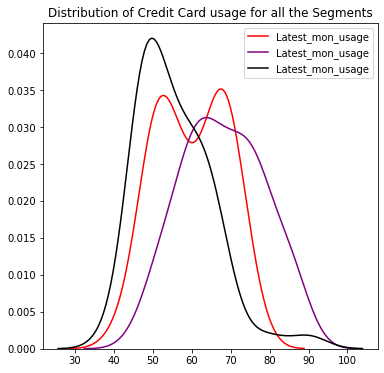

In [81]:
# plotting the Credit Card usage for all the Segments:
plt.figure(figsize=(6,6))
sns.kdeplot(seg1, color = 'r')
sns.kdeplot(seg2, color = 'purple')
sns.kdeplot(seg3, color = 'k')
plt.title('Distribution of Credit Card usage for all the Segments')
plt.show()

In [63]:
# Step 2: Perform ANOVA Test:

t4 = stats.f_oneway(seg1, seg2, seg3)
t4

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

In [65]:
print('The test statistic is {} and the p-value is {}.'.format(t4[0], t4[1]))

The test statistic is 29.279283801321778 and the p-value is 7.36401083352674e-12.


In [66]:
# Checking if p value is greater than 5% alpha
t4[1] > 0.05

False

#### Conclusion:

The p-value is less than 5% alpha, hence we reject the null hypothesis. With 95% confidence can conclude that the average usage of credit card between segments 1, 2 and 3 are not same. Therefore, there is statisical significance between the segments in terms of credit card usage meaning the segments do impact the credit card usage.

---------------

### 5. Is there any relation between region & Segment?

To test for the relationship between the region and segment, shall condut Chi-Square Test as both are categorical variables.The null and alternative hypothesis:


    H0: Observed values == Expected values
           (There is no relationship between regions and segments.)
           
    H1: Observed values <> Expected values
           (There is relationship between regions and segments.)
            
We will conduct the test at 5% significance level. This is a one-tailed test as Chi-Square dis is based only on one-tailed.

In [69]:
# Step 1: Create the crosstab for the observed values for Region and Segment:

table = pd.crosstab(df.region, df.segment)
table

segment,1,2,3
region,,,
1,16,19,12
2,20,44,31
3,9,42,7


In [70]:
# Step 2: Perform the Chi-Square Test:

t3 = stats.chi2_contingency(observed = table)
t3

(16.604441649489342,
 0.0023066300908054713,
 4,
 array([[10.575, 24.675, 11.75 ],
        [21.375, 49.875, 23.75 ],
        [13.05 , 30.45 , 14.5  ]]))

In [71]:
print('The Chi-Square test statistic is {} and the p-value is {}.'.format(t3[0], t3[1]))

The Chi-Square test statistic is 16.604441649489342 and the p-value is 0.0023066300908054713.


In [72]:
# Checking if p-value is greater than 5% alpha:

t3[1] > 0.05 

False

#### Conclusion:

The p-value is less than 5% alpha, hence we reject the null hypothesis. With 95% confidence can conclude that there is relationship between the region and segments. Therefore, is statistically significant.

---------------

### 6. Is the relationship between card usage in the latest month and pre usage of campaign?

To check for the relationship between card usage in the latest month and pre-usage of campaign, shall conduct Pearson Correlation test as both the features are numerical. 

The null and alternative hypothesis:
    
    
    H0: There is relationship between card usage in the latest month and pre-usage of campaign
    H1: There is no relationship between card usage in the latest month and pre-usage of campaign
    
We will conduct the test at 5% significance level. It is a two-tailed test.

In [90]:
# Performing the Pearson correlation test:
t6 = stats.pearsonr(df.Latest_mon_usage, df.pre_usage)
t6

(0.6622801251558603, 1.2767419295069521e-26)

In [91]:
print("The test statistics is {} and the p value is {}".format(t6, t6[1]))

The test statistics is (0.6622801251558603, 1.2767419295069521e-26) and the p value is 1.2767419295069521e-26


In [92]:
# checking if pvalue is greater than 5% alpha
t6[1] > 0.05

False

#### Conclusion:

The p-value is less than 5% alpha, hence we reject the null hypothesis. With 95% confidence can conclude that there is relationship between card usage in the latest month and pre-usage of campaign. Therefore, is statistically significant.

#### Scatter Plot to depict relationship between Latest Month usage and Pre usage of Campaign

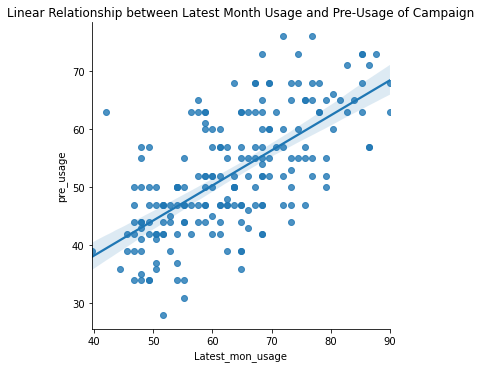

In [99]:
sns.lmplot(x = "Latest_mon_usage", y = "pre_usage",data = df)
plt.title('Linear Relationship between Latest Month Usage and Pre-Usage of Campaign')
plt.show()

-----------------
